In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import chi2
from scipy.stats import chi


import seaborn as sns
from sklearn.metrics import accuracy_score

### Task 1 (Getting to know SVM)
Try to understand the following code. Experiment with the parameters of the function make_blobs.

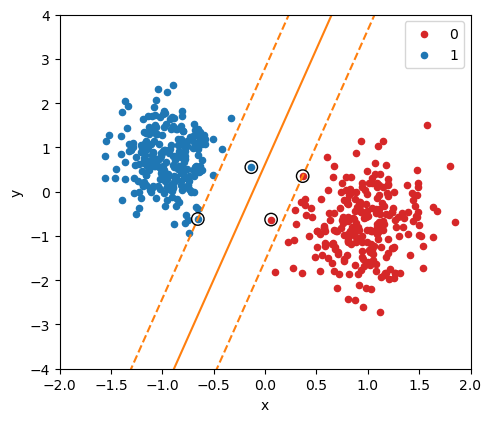

In [2]:
data_x, y = make_blobs(n_samples = 500, n_features=2, centers=2, cluster_std=(.8,.6), center_box=(-16,2.5), random_state=143)

scaler = StandardScaler()
scaler.fit(data_x)

x = scaler.transform(data_x)

df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))

colors = {0: 'tab:red', 1: 'tab:blue'}

fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

sep = svm.SVC(kernel="linear", C=2)
sep.fit(x, y)

# get the separating hyperplane
w = sep.coef_[0]
a = -w[0] / w[1]
x = np.linspace(-10, 2)
y = a * x - (sep.intercept_[0]) / w[1]
ax.plot(x, y, c='tab:orange')

margin = 1 / np.sqrt(np.sum(sep.coef_**2))
yy_down = y - np.sqrt(1 + a**2) * margin
yy_up = y + np.sqrt(1 + a**2) * margin

ax.plot(x, yy_down, c='tab:orange', ls='--')
ax.plot(x, yy_up, c='tab:orange', ls='--')

ax.scatter(
        sep.support_vectors_[:, 0],
        sep.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )

ax.set_xlim([-2,2])
ax.set_ylim([-4,4])

plt.show()

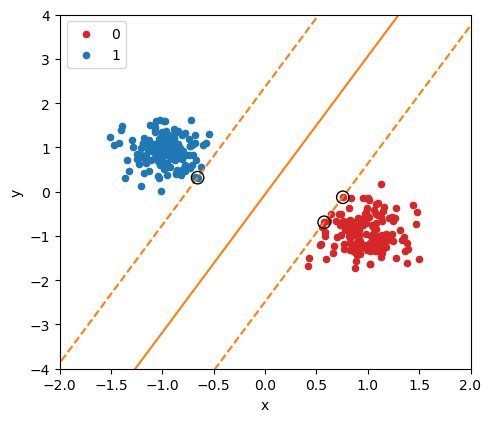

In [3]:
## I have change the values for n_samples,cluster_std ,center_box and random_state in make_blobs function and added shuffle parameter 

data_x, y = make_blobs(n_samples = 300, n_features=2, centers=2, cluster_std=(.9,.8), center_box=(-20,3), random_state=200,shuffle=False)

scaler = StandardScaler()
scaler.fit(data_x)

x = scaler.transform(data_x)
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))

colors = {0: 'tab:red', 1: 'tab:blue'}

fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
sep = svm.SVC(kernel="linear", C=2)
sep.fit(x, y)

# get the separating hyperplane
w = sep.coef_[0]
a = -w[0] / w[1]
x = np.linspace(-10, 2)
y = a * x - (sep.intercept_[0]) / w[1]
ax.plot(x, y, c='tab:orange')

margin = 1 / np.sqrt(np.sum(sep.coef_**2))
yy_down = y - np.sqrt(1 + a**2) * margin
yy_up = y + np.sqrt(1 + a**2) * margin

ax.plot(x, yy_down, c='tab:orange', ls='--')
ax.plot(x, yy_up, c='tab:orange', ls='--')

ax.scatter(
        sep.support_vectors_[:, 0],
        sep.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )

ax.set_xlim([-2,2])
ax.set_ylim([-4,4])

plt.show()


Task: What is the StandardScaler doing? Replace the StandardScaler with a self-written function that does a normalization, i.e. scaling the features to the interval [-1,1] (or [0,1] if you prefer). Visualize the result.

Standard Scalar is removing the mean and scaling it to unit variance like std distribution where z=(x-mean)/s.
Standardization is a rescaling technique that refers to centering the distribution of the data on the value 0 and the standard deviation to the value 1.

In [4]:
data_x, y = make_blobs(n_samples = 300, n_features=2, centers=2, cluster_std=(.9,.8), center_box=(-20,3), random_state=200,shuffle=False)

print('\n10 sample data from original data')
print(data_x[:10])

def custom_normalization(X):
    x1_min=X[:,0].min()
    x2_min=X[:,1].min()
    x1_max=X[:,0].max()
    x2_max=X[:,1].max()

    for i in range(len(X)):
        X[i,0]=(X[i,0]-x1_min)/(x1_max-x1_min)
        X[i,1]=(X[i,1]-x2_min)/(x2_max-x2_min)
    return X



print('Before normalizing the data')
print('Minimum and maximum value of 1st column in data : ', data_x[:,0].min() , data_x[:,0].max())
print('Minimum and maximum value of 2nd column in data : ', data_x[:,1].min() , data_x[:,1].max())

x=custom_normalization(data_x)

print('\nAfter normalizing the data to the interval [0,1]')
print('Minimum and maximum value of 1st column in data : ', x[:,0].min() , x[:,0].max())
print('Minimum and maximum value of 2nd column in data : ', x[:,1].min() , x[:,1].max())

print('\n10 sample data from normalize data')
print(x[:10])


10 sample data from original data
[[  2.43623315 -15.01237377]
 [  2.12086152 -14.81906402]
 [  1.59632986 -14.35987822]
 [  1.17279647 -14.07660398]
 [  1.86146613 -13.61645188]
 [  1.98767525 -13.87379526]
 [  3.51608251 -15.26611378]
 [  3.45346355 -15.74092089]
 [  1.01891725 -14.57554097]
 [  0.75677831 -13.69592368]]
Before normalizing the data
Minimum and maximum value of 1st column in data :  -8.568195588985967 4.019020584612372
Minimum and maximum value of 2nd column in data :  -16.690843317920404 -8.494240750331759

After normalizing the data to the interval [0,1]
Minimum and maximum value of 1st column in data :  0.0 1.0
Minimum and maximum value of 2nd column in data :  0.0 1.0

10 sample data from normalize data
[[0.87425437 0.20477625]
 [0.84919945 0.22836038]
 [0.80752768 0.28438186]
 [0.77387978 0.31894182]
 [0.82859161 0.37508119]
 [0.83861838 0.34368484]
 [0.96004374 0.17381952]
 [0.95506893 0.11589222]
 [0.76165474 0.25807063]
 [0.74082893 0.36538549]]


Task: Experiment with the parameters of the SVM classifier (leave the kernel to be linear for now).

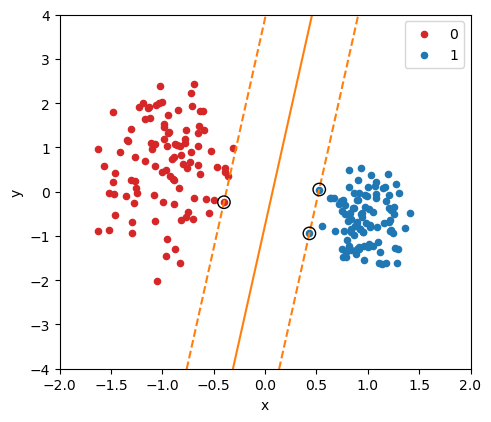

In [5]:
## I have change the values for n_samples,cluster_std ,center_box and random_state in make_blobs function and added shuffle parameter 
## I have added some extra parameters in SVM.SVC function 


data_x, y = make_blobs(n_samples = 200, n_features=2, centers=2, cluster_std=(.9,.6), center_box=(-15,3), random_state=20,shuffle=True)

scaler = StandardScaler()
scaler.fit(data_x)

x = scaler.transform(data_x)
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))

colors = {0: 'tab:red', 1: 'tab:blue'}

fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
sep = svm.SVC(kernel="linear", C=100,shrinking = True,decision_function_shape = 'ovo')
sep.fit(x, y)

# get the separating hyperplane
w = sep.coef_[0]
a = -w[0] / w[1]
x = np.linspace(x[:,0].min(), x[:,1].max())
y = a * x - (sep.intercept_[0]) / w[1]
ax.plot(x, y, c='tab:orange')

margin = 1 / np.sqrt(np.sum(sep.coef_**2))
yy_down = y - np.sqrt(1 + a**2) * margin
yy_up = y + np.sqrt(1 + a**2) * margin

ax.plot(x, yy_down, c='tab:orange', ls='--')
ax.plot(x, yy_up, c='tab:orange', ls='--')

ax.scatter(
        sep.support_vectors_[:, 0],
        sep.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )

ax.set_xlim([-2,2])
ax.set_ylim([-4,4])

plt.show()

## Task 2 (SVM with not completely separable data)
Create with the make_blobs function from the previous task a data set that cannot be separated by a line. Visualize the data, do not fit a SVM, yet.

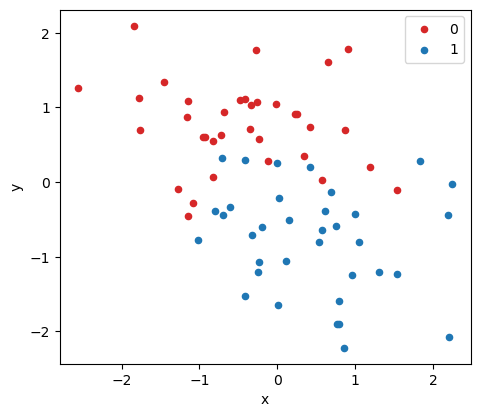

In [6]:
data_x1, y1 = make_blobs(n_samples = 70, n_features=2, centers=2, cluster_std=(.8,.9), center_box=(-8,6), random_state=0,shuffle=True)

scaler = StandardScaler()
scaler.fit(data_x1)

x1 = scaler.transform(data_x1)
df = pd.DataFrame(dict(x=x1[:,0], y=x1[:,1], label=y1))

colors = {0: 'tab:red', 1: 'tab:blue'}

fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    


Task: Try to find the best linear classifier (SVM) for the data you just created. Experiment with the value of the parameter C in the SVM classifier. What does it do?

C parameter in SVM is Penalty parameter of the error term. You can consider it as the degree of correct classification that the algorithm has to meet or the degree of optimization the the SVM has to meet.
For greater values of C better the SVM clasifire classify the data

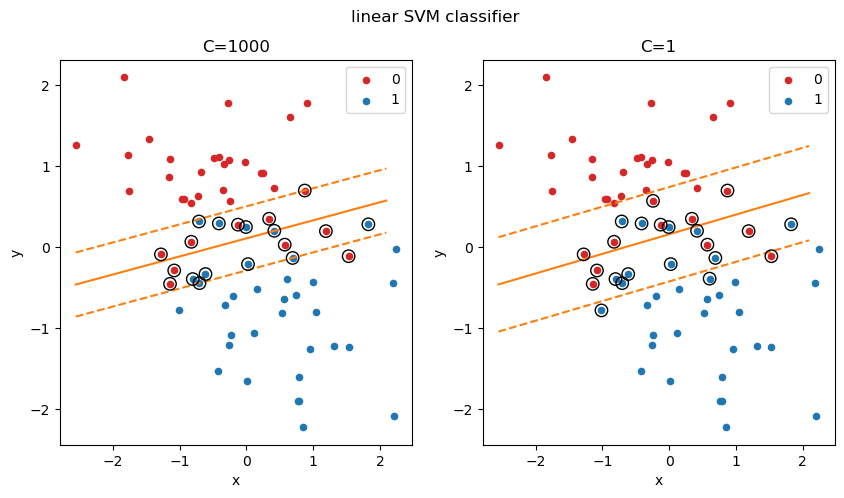

In [7]:
#SVM classifier with C=1000
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
fig.suptitle('linear SVM classifier')
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax[0], kind='scatter', x='x', y='y', label=key, color=colors[key])

sep1 = svm.SVC(kernel="linear", C=1000)
sep1.fit(x1, y1)

# get the separating hyperplane
w = sep1.coef_[0]
a = -w[0] / w[1]
x2 = np.linspace(x1[:,0].min(), x1[:,1].max())
y2 = a * x2 - (sep1.intercept_[0]) / w[1]
ax[0].plot(x2, y2, c='tab:orange')

margin = 1 / np.sqrt(np.sum(sep1.coef_**2))
yy_down = y2 - np.sqrt(1 + a**2) * margin
yy_up = y2 + np.sqrt(1 + a**2) * margin

#ploting the SVM with C=1000
ax[0].plot(x2, yy_down, c='tab:orange', ls='--')
ax[0].plot(x2, yy_up, c='tab:orange', ls='--')

ax[0].scatter(
        sep1.support_vectors_[:, 0],
        sep1.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )
ax[0].set_title("C=1000")


#SVM classifier with C=1
for key, group in grouped:
    group.plot(ax=ax[1], kind='scatter', x='x', y='y', label=key, color=colors[key])

sep2 = svm.SVC(kernel="linear", C=1)
sep2.fit(x1, y1)

# get the separating hyperplane
w1 = sep2.coef_[0]
a1 = -w1[0] / w1[1]
x3 = np.linspace(x1[:,0].min(), x1[:,1].max())
y3 = a1 * x3 - (sep1.intercept_[0]) / w1[1]
ax[1].plot(x3, y3, c='tab:orange')

margin1 = 1 / np.sqrt(np.sum(sep2.coef_**2))
yy_down1 = y3 - np.sqrt(1 + a1**2) * margin1
yy_up1 = y3 + np.sqrt(1 + a1**2) * margin1

#ploting the SVM with C=1000
ax[1].plot(x3, yy_down1, c='tab:orange', ls='--')
ax[1].plot(x3, yy_up1, c='tab:orange', ls='--')

ax[1].scatter(
        sep2.support_vectors_[:, 0],
        sep2.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )
ax[1].set_title("C=1")

plt.show()


**As you can see in above result that when value of parameter C=1 then margin vectors of the classifier are far from support vector and most of the data points are in between this margins. when C=1000 then margin vectors are closer to support vector as compare to C=1 vector and less data points are in between this margin.**

**so the conclusion is when the value of C is greater then SVM classifier perform better.**

Task: Now repeat the previous subtask, but first split the data into training and test data (Visualize both in two subplots (side by side)). Fit a SVM classifier to the training data and evaluate its performance with the test data.

Text(0.5, 1.0, 'Testing data')

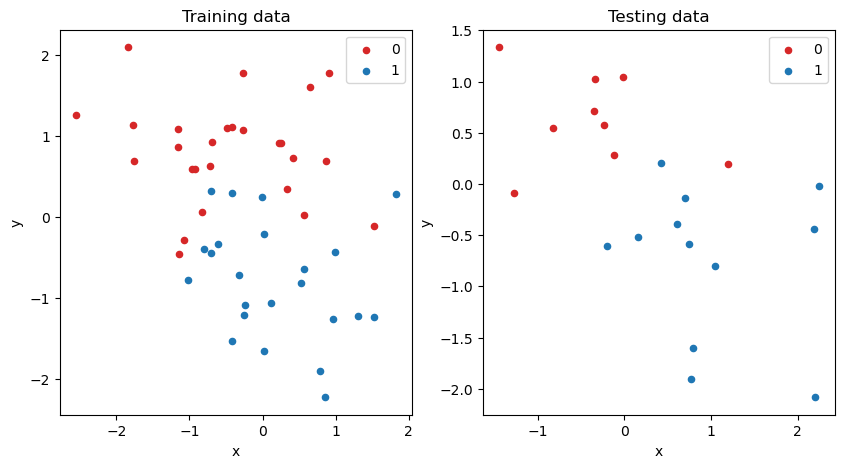

In [8]:
#split data in testing and training data 
xa_train, xa_test, ya_train, ya_test = train_test_split(x1, y1, random_state=0,test_size=0.3)

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=False)
df_a = pd.DataFrame(dict(x=xa_train[:,0], y=xa_train[:,1], label=ya_train))
colors = {0: 'tab:red', 1: 'tab:blue'}
grouped_a = df_a.groupby('label')

for key, group in grouped_a:
    group.plot(ax=ax[0], kind='scatter', x='x', y='y', label=key, color=colors[key])
    
df_b = pd.DataFrame(dict(x=xa_test[:,0], y=xa_test[:,1], label=ya_test))
colors = {0: 'tab:red', 1: 'tab:blue'}
grouped_b = df_b.groupby('label')

for key, group in grouped_b:
    group.plot(ax=ax[1], kind='scatter', x='x', y='y', label=key, color=colors[key])

ax[0].set_title("Training data")
ax[1].set_title("Testing data")    

Text(0.5, 1.0, 'SVM classifier with Training data')

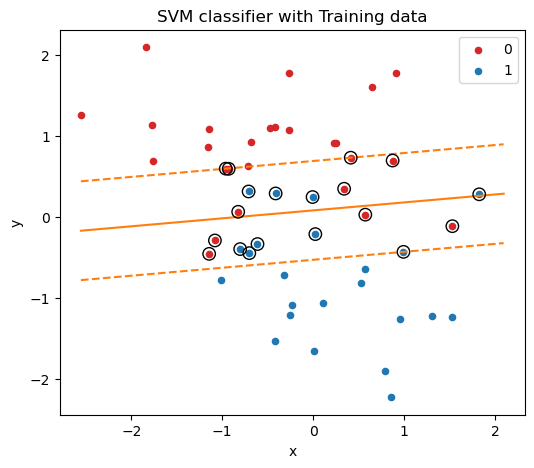

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6,5), sharey=False)

#SVM for train data
svc = svm.SVC(kernel="linear", C=1)
svc.fit(xa_train, ya_train)

for key, group in grouped_a:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
# get the separating hyperplane
wa = svc.coef_[0]
a_a = -wa[0] / wa[1]
x2 = np.linspace(xa_train[:,0].min(), xa_train[:,1].max())
y2 = a_a * x2 - (svc.intercept_[0]) / wa[1]
ax.plot(x2, y2, c='tab:orange')

margin = 1 / np.sqrt(np.sum(svc.coef_**2))
yy_down = y2 - np.sqrt(1 + a_a**2) * margin
yy_up = y2 + np.sqrt(1 + a_a**2) * margin

ax.plot(x2, yy_down, c='tab:orange', ls='--')
ax.plot(x2, yy_up, c='tab:orange', ls='--')

ax.scatter(
        svc.support_vectors_[:, 0],
        svc.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )
ax.set_title("SVM classifier with Training data")


In [10]:
#checking the performance of linear kernel SVM

#Predicting the test set result  
y_pred= svc.predict(xa_test) 

# Accuracy of linear kernel
accuracy_score(ya_test, y_pred)


0.8571428571428571

# Radial-Basis Function Kernel

In [11]:
#SVM with kernel as rbf
rbf_svc = svm.SVC(kernel='rbf', C=1)
rbf_svc.fit(xa_train, ya_train)

#Predicting the test set result  
y_pred= rbf_svc.predict(xa_test) 
#accuracy of rbf kernel
accuracy_score(ya_test, y_pred)

0.9523809523809523

# Polynomial Kernel

In [12]:
#SVM with kernel as poly
poly_svc = svm.SVC(kernel='poly', C=1)
poly_svc.fit(xa_train, ya_train)

#Predicting the test set result  
y_pred= poly_svc.predict(xa_test) 
#accuracy of poly kernel
accuracy_score(ya_test, y_pred)

0.9047619047619048

visualize the results using Kernel PCA Visualization.

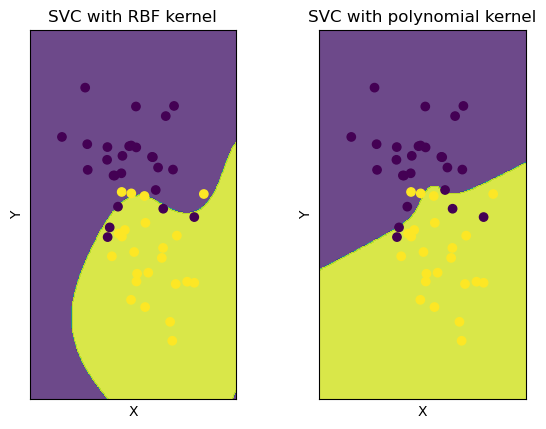

In [13]:
# Creating the mesh
x_min, x_max = xa_train[:, 0].min() - 1, xa_train[:, 0].max() + 1
y_min, y_max = xa_train[:, 1].min() - 1, xa_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# title for the plots
titles = ['SVC with RBF kernel',
          'SVC with polynomial kernel']

for i, clf in enumerate((rbf_svc, poly_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

    # Plot also the training points
    plt.scatter(xa_train[:, 0], xa_train[:, 1], c=ya_train, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

According to accuracy of the SVM classifier with different kernel and the visualization, we come to know that the RBF kernel is the best kernel for my data.

## Task 3 (PCA by hand)

To understand PCA and also to get an intuition regarding eigenvectors and eigenvalues of a covariance matrix, it is best to perform PCA by hand.

We follow the 4 steps (detailed in the following subtask descriptions):
- Mean subtraction
- Standardization
- Eigendecomposition of the covariance matrix
- Projection

First we create some normally distributed data (2D).

In [14]:
N = 600
D = 2

# The desired mean values of the sample.
mu = np.array([2.0, 2.0])

# The desired covariance matrix.
r = np.array([[ 1,  2],
              [ 2,  5]])

# Generate the random samples.
rng = np.random.default_rng(667)
x = rng.multivariate_normal(mu, r, size=N)

x_orig = x

print(f'Shape of input data: {np.shape(x)}')

Shape of input data: (600, 2)


**Task:** Visualize the data.

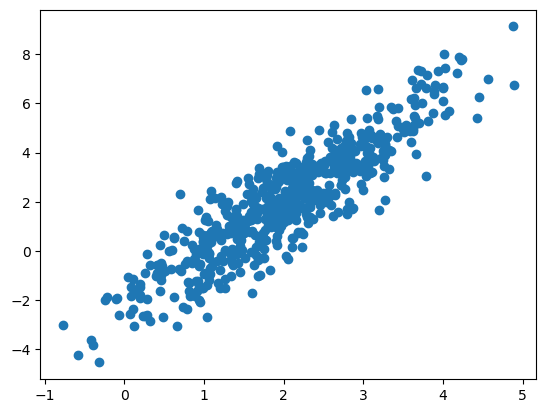

In [15]:
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1]))

plt.scatter(df['x'],df['y'])


**Task:** Determine mean $\mu$ and standard deviation $\sigma$ of the data. "Save" them in two separate variables. Note that we have data of the form $x =[(x_{1,1}, x_{2,1})^T, \ldots, (x_{1,N},x_{2,N})^T]^T \in \mathbb R^{N\times D}$. Which dimension does the mean and standard deviation have?

In [16]:
mean=np.mean(x.T, axis=1)
std=np.std(x.T, axis=1)

print(mean,std)

[2.020207   2.02719079] [0.98933341 2.28224633]


**Task (Mean subtraction):** Subtract from every data point $x_i=(x_{1,i},x_{2,i}), i \in \{1,\ldots,N\}$ the mean $\mu$. Note that mean subtraction is not strictly necessary but reduces the risk of numerical problems and the need of an intercept when doing the projection step.

In [17]:
msub=x-mean
msub

array([[-0.53550119, -0.13785759],
       [ 0.3499165 ,  1.18763648],
       [-1.61434947, -2.58639227],
       ...,
       [-0.93250091, -1.5120067 ],
       [ 1.27563569,  2.62445626],
       [-0.57119923, -1.60595256]])

**Task (Standardization):** Divide the data points $x_i$ by the standard deviation $\sigma$.

In [18]:
standz=x/std
standz

array([[ 1.50071331,  0.8278393 ],
       [ 2.39567721,  1.40862414],
       [ 0.41023332, -0.2450224 ],
       ...,
       [ 1.0994333 ,  0.22573553],
       [ 3.33137712,  2.03818799],
       [ 1.46463039,  0.18457176]])

**Task:** Visualize the original data as well as the normalized data obtained from the two previous steps (i.e. mean subtraction and standardization) in three subplots side by side.

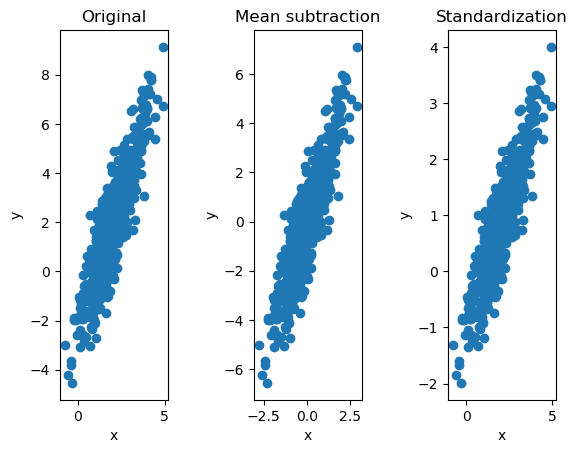

In [19]:
df_mean = pd.DataFrame(dict(x=msub[:,0], y=msub[:,1]))
df_std = pd.DataFrame(dict(x=standz[:,0], y=standz[:,1]))
titles = ['Original', 'Mean subtraction', 'Standardization']
df_array = [df, df_mean, df_std]
for i, title in enumerate(titles):
    plt.subplot(1, 3, i + 1)
    plt.subplots_adjust(wspace=0.8, hspace=0.4)
    plt.scatter(df_array[i]['x'], df_array[i]['y'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
plt.show()

**Task:** Determine the data covariance matrix $S=\dfrac{1}{N}\cdot x^T\cdot x$. What shape does this matrix have? Compare the obtained covariance matrix with the matrix obtained by `numpy.cov`.

In [20]:
p=msub.T.dot(msub)
S=(p/N)
S.shape


(2, 2)

In [21]:
S

array([[0.9787806 , 2.03222566],
       [2.03222566, 5.2086483 ]])

In [22]:
cvmtx=np.cov(msub.T)
cvmtx

array([[0.98041462, 2.03561836],
       [2.03561836, 5.21734387]])

**Task:** Determine the eigenvalues $\lambda_i$ and eigenvectors $v_i$ of the matrix S with help of the command `numpy.linalg.eigh`. Determine the eigenvalue with the largest absolute value $\lambda_\ast$ and find the corresponding eigenvector $v_\ast$.

In [23]:
evalu,evect=np.linalg.eigh(cvmtx)
print (evalu)
print (evect)

[0.1609149  6.03684359]
[[-0.92764904  0.37345317]
 [ 0.37345317  0.92764904]]


**Task (Projection):** Project all data points $x_i$ onto the principal subspace (corresponding to the eigenvector $v_\ast$) by employing the formula $\tilde x_\ast = (v_\ast \cdot v_\ast^T) \cdot x_i$. If you cannot recall projections from your linear algebra course, make sure to read up on the dot product to understand the projection step better.

In [24]:
projected = np.dot((evect.T @ evect), x_orig.T).T
projected

array([[ 1.48470581,  1.8893332 ],
       [ 2.3701235 ,  3.21482727],
       [ 0.40585753, -0.55920148],
       ...,
       [ 1.08770609,  0.51518409],
       [ 3.29584269,  4.65164705],
       [ 1.44900777,  0.42123823]])

**Task:** Visualize the normalized data together with the projected data. And visualize the projected data in the original data space (i.e. you have to reverse the normalization steps) together with the original data.

mean centred and std deviation data is normalised

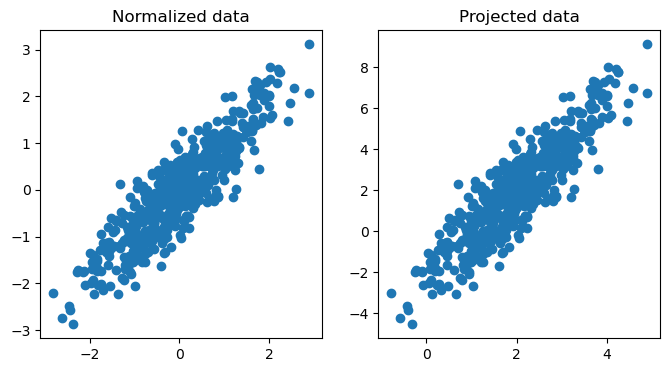

In [25]:
normalized = msub/std

fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.scatter(normalized[:,0], normalized[:,1])
ax2.scatter(projected[:,0], projected[:,1])

ax1.set_title('Normalized data')
ax2.set_title('Projected data')
plt.show()

**Task:** In the following, we study the relationship between the covariance matrix, the data and the eigenvectors.

To do so, create $x_{circ},y_{circ}$ - data of a circle of radius one, i.e. the unit circle. You can simply use the polar coordinate form of the circle: $x_{circ}=\cos{\phi}, y_{circ}=\sin{\phi}, \phi \in [0, 2\pi]$. Multiply the covariance matrix with the circle data to obtain the eigenellipse, i.e. $ellipse_i = A\cdot (x_{circ,i},y_{circ,i})^T$. Visualize both (the eigenellipse and the circle) in two subplots (side-by-side). Also draw into the subplot with the ellipse the eigenvectors scaled by the eigenvalues (to indicate the principal axes of the ellipse).

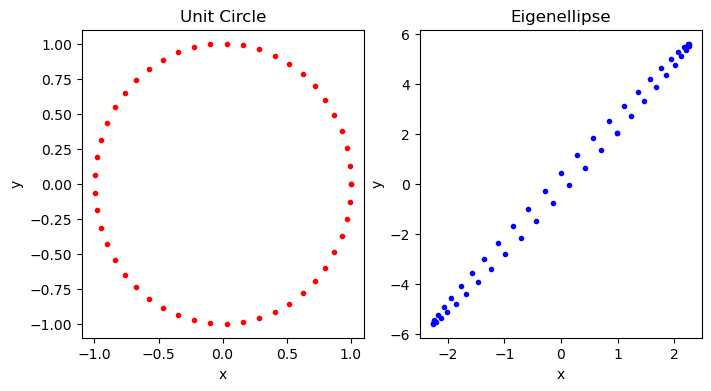

In [26]:
d = 50

t = np.linspace(0, 2*np.pi, d)

xcirc = np.cos(t)
ycirc = np.sin(t)


# Using the formula
ellipse = np.dot(cvmtx, np.vstack((xcirc, ycirc)))

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.scatter(xcirc, ycirc, marker='.', color='r')

ax2.scatter(ellipse[0,:], ellipse[1,:], marker='.', color='b')


ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Unit Circle')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Eigenellipse')

# Show the plots
plt.show()